<center><h1><font color=yellow><i> Ozone - Random Foorest </i></font></h1></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Data

Import Data

In [2]:
data=pd.read_csv('ozone_complet.csv', sep=';')
data.head()

,date,maxO3,T6,T9,T12,T15,T18,Ne6,Ne9,Ne12,...,Vdir9,Vvit9,Vdir12,Vvit12,Vdir15,Vvit15,Vdir18,Vvit18,Vx,maxO3v
0,19950401,"47,6","10,1","11,6","13,3","13,6","12,2",8.0,8.0,8.0,...,290.0,4.0,300.0,4.0,340.0,4.0,20.0,4.0,"-3,4641","62,2"
1,19950402,"56,2","9,5","9,4","13,8","17,4","16,3",8.0,8.0,7.0,...,160.0,2.0,180.0,3.0,110.0,1.0,350.0,2.0,0,"47,6"
2,19950403,"61,8","3,6",8,"16,8","21,5","20,2",4.0,5.0,2.0,...,20.0,2.0,340.0,1.0,170.0,2.0,170.0,3.0,"-0,342","56,2"
3,19950404,"50,8","9,5","10,5","11,4","12,2","11,4",8.0,7.0,7.0,...,10.0,4.0,350.0,3.0,350.0,3.0,350.0,4.0,"-0,5209","61,8"
4,19950405,"59,8","9,8","10,8","13,8","14,3","13,3",8.0,7.0,8.0,...,340.0,2.0,280.0,1.0,320.0,3.0,350.0,4.0,"-0,9848","50,8"


> Nous voulons savoir les types de données et si nous avons des valeurs nulles

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464 entries, 0 to 1463
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1464 non-null   int64  
 1   maxO3   1391 non-null   object 
 2   T6      1463 non-null   object 
 3   T9      1463 non-null   object 
 4   T12     1463 non-null   object 
 5   T15     1463 non-null   object 
 6   T18     1463 non-null   object 
 7   Ne6     1462 non-null   float64
 8   Ne9     1462 non-null   float64
 9   Ne12    1462 non-null   float64
 10  Ne15    1462 non-null   float64
 11  Ne18    1459 non-null   float64
 12  Vdir6   1463 non-null   float64
 13  Vvit6   1463 non-null   float64
 14  Vdir9   1463 non-null   float64
 15  Vvit9   1463 non-null   float64
 16  Vdir12  1463 non-null   float64
 17  Vvit12  1463 non-null   float64
 18  Vdir15  1463 non-null   float64
 19  Vvit15  1463 non-null   float64
 20  Vdir18  1463 non-null   float64
 21  Vvit18  1463 non-null   float64
 22  

**Remarque :** Nous pouvons voir qu'il existe des colonnes de `dtype` "object" alors qu'elle doivent être des nombre, ainsi que la colonne `date` doit être de type date. De plus, nous pouvons voir que la colonne `maxO3` contient des valeurs nulles.  

> Nous allons transformer les colonnes de type `object` au type `float`, ainsi qu'on va transformer notre colonne `date` au type `datetime`.

In [4]:
object_list= ['maxO3', 'T6', 'T9', 'T12','T15', 'T18', 'Vx', 'maxO3v']
for column in object_list :
    data[column] = data[column].apply(lambda x: str(x).replace(',', '.'))
    data[column] = data[column].astype(float)
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d')


> Génèration des statistiques descriptives pour nos colonnes.

In [5]:
data.describe()

,date,maxO3,T6,T9,T12,T15,T18,Ne6,Ne9,Ne12,...,Vdir9,Vvit9,Vdir12,Vvit12,Vdir15,Vvit15,Vdir18,Vvit18,Vx,maxO3v
count,1464,1391.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1462.000000,1462.000000,1462.000000,...,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1391.000000
mean,1998-12-30 18:00:00.000000128,85.070453,12.255913,16.349146,19.397334,20.327136,18.752905,5.010260,5.140903,5.321477,...,195.119617,3.756664,204.326726,4.531100,206.951470,4.812714,190.143541,4.401914,-0.708441,85.074623
min,1995-04-01 00:00:00,33.200000,-1.600000,4.500000,3.900000,5.700000,4.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.392300,33.200000
25%,1997-02-14 06:00:00,68.000000,9.900000,13.800000,16.150000,16.750000,15.500000,2.000000,3.000000,4.000000,...,100.000000,2.000000,110.000000,3.000000,100.000000,3.000000,60.000000,3.000000,-3.064200,68.000000
50%,1998-12-30 12:00:00,81.000000,12.600000,16.600000,19.300000,20.300000,18.600000,6.000000,6.000000,6.000000,...,210.000000,4.000000,220.000000,4.000000,230.000000,5.000000,220.000000,4.000000,-1.026100,81.000000
75%,2000-11-14 18:00:00,98.000000,15.000000,19.000000,22.600000,23.900000,22.000000,8.000000,7.000000,7.000000,...,290.000000,5.000000,295.000000,6.000000,300.000000,6.000000,290.000000,6.000000,1.532100,98.000000
max,2002-09-30 00:00:00,173.000000,21.700000,28.600000,33.500000,35.500000,34.100000,9.000000,9.000000,8.000000,...,360.000000,12.000000,360.000000,12.000000,360.000000,16.000000,360.000000,12.000000,10.832900,173.000000
std,NaN,23.316925,3.900193,4.112326,4.907907,5.267362,5.074725,2.913168,2.577873,2.334590,...,107.235355,1.893428,105.838169,2.066662,110.776403,2.070687,121.167570,1.761356,3.451230,23.318205


> Normalement, nous voulons prévoir le pic d’ozone journalier pour le lendemain, or pour chaque ligne nous avons que le pic d'ozone de la veille et du jour, donc nous allons ajouter une colonne `maxO3l` pour avoir le pic d'ozone du lendemain.

In [6]:
for x in range(len(data)-1) :
    data.loc[x,'maxO3l'] = data.loc[x+1,'maxO3']

> Puisque notre cible est la colonne `maxO3l` nous allons garder que les lignes dont cette colonne n'est pas manquante.

In [7]:
data.dropna(subset=['maxO3l'], inplace=True)


> Une visualisation statistique sur la colonne `maxO3`

<Axes: xlabel='maxO3'>

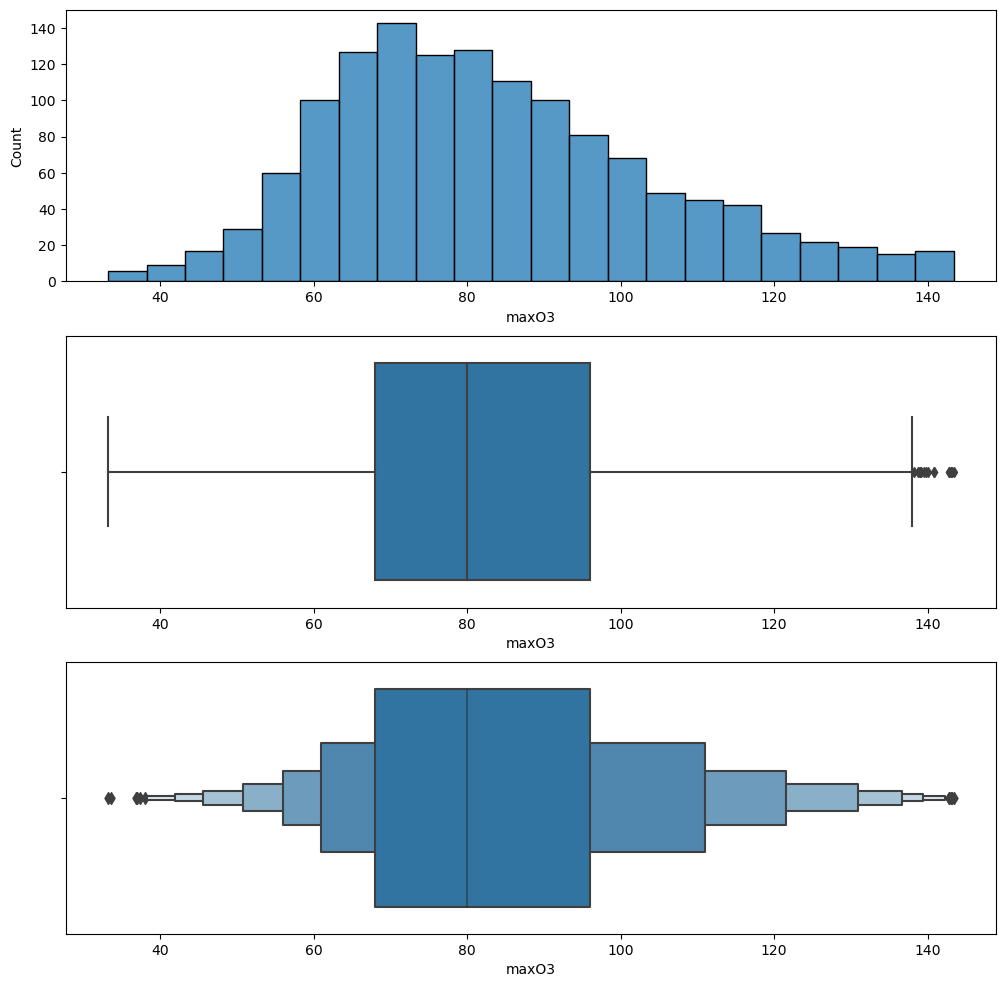

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(12, 12), nrows=3)
max_limit = data["maxO3"].quantile(.98)
df = data[data["maxO3"] < max_limit]["maxO3"]
sns.histplot(x=df, ax=axes[0])
sns.boxplot(x=df, ax=axes[1])
sns.boxenplot(x=df, ax=axes[2])

In [9]:
# Remplacement des valeurs manquantes dans les colonnes numériques par la moyenne
numeric_columns = ['maxO3', 'T6', 'T9', 'T12', 'T15', 'T18', 'Ne6', 'Ne9', 'Ne12',
       'Ne15', 'Ne18', 'Vdir6', 'Vvit6', 'Vdir9', 'Vvit9', 'Vdir12', 'Vvit12',
       'Vdir15', 'Vvit15', 'Vdir18', 'Vvit18', 'Vx', 'maxO3v', 'maxO3l']
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())



In [10]:
data.shape

(1390, 25)

In [11]:

data.dropna(inplace=True)
data.to_csv('ozone_complet_preprocessed.csv')

In [12]:
data.shape

(1390, 25)